In [19]:
import numpy as m

def hms2deg(hours,minutes,seconds):
    deg = (hours  + (minutes / 60) + (seconds / 3600))*15
    return deg

def dms2deg(degrees,minutes,seconds):
    if(degrees[0]=='-'):
        if(degrees[1]=='0'):
            if(len(degrees)<=2):
                deg = -(float(degrees) + (minutes / 60) + (seconds / 3600))
            elif(degrees[2]=='0'):
                deg = -(float(degrees) + (minutes / 60) + (seconds / 3600))
            else:
                deg = -(-(float(degrees)) + (minutes / 60) + (seconds / 3600))
        else:
            deg = -(-(float(degrees)) + (minutes / 60) + (seconds / 3600))
    else:
        deg = ((float(degrees)) + (minutes / 60) + (seconds / 3600))
    return deg

alpha1 = hms2deg(5,55,10.30536)
delta1 = dms2deg("+07",24,25.4304)

alpha2 = hms2deg(6,45,8.917)
delta2 = dms2deg("-16",42,58.02)

def angDist(alpha1,delta1,alpha2,delta2):
    x = m.abs(delta1-delta2)/2
    y = m.abs(alpha1-alpha2)/2
    z = m.pi/180
    return 2*m.arcsin(m.sqrt(m.sin(x*z)**2+m.cos(delta1*z)*m.cos(delta2*z)*m.sin(y*z)**2))

angDist(alpha1,delta1,alpha2,delta2)

1.0088518264734245

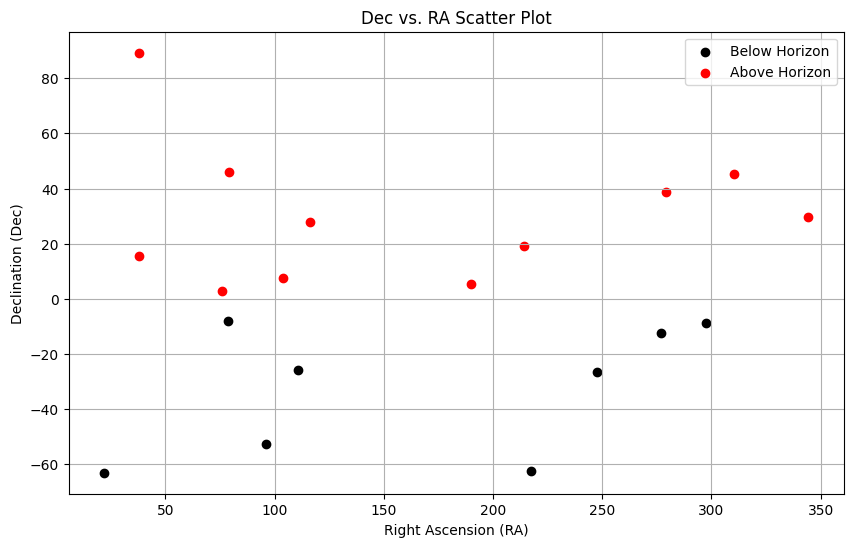

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def hms2deg(hours,minutes,seconds):
    deg = (hours  + (minutes / 60) + (seconds / 3600))*15
    return deg

def dms2deg(degrees,minutes,seconds):
    if(degrees[0]=='-'):
        if(degrees[1]=='0'):
            if(len(degrees)<=2):
                deg = -(float(degrees) + (minutes / 60) + (seconds / 3600))
            elif(degrees[2]=='0'):
                deg = -(float(degrees) + (minutes / 60) + (seconds / 3600))
            else:
                deg = -(-(float(degrees)) + (minutes / 60) + (seconds / 3600))
        else:
            deg = -(-(float(degrees)) + (minutes / 60) + (seconds / 3600))
    else:
        deg = ((float(degrees)) + (minutes / 60) + (seconds / 3600))
    return deg

# Example data for demonstration
# ra_data = np.random.uniform(0, 360, 100)  # Random RA values between 0 and 360 degrees
# dec_data = np.random.uniform(-90, 90, 100)  # Random Dec values between -90 and 90 degrees


Starh1 = [18,20,5,14,2,16,18,7,6,19,14,22,7,5,12,1,2,5,6]
StarM1 = [36,41,14,29,31,29,27,22,23,50,15,57,45,16,39,26,31,2,55,45]
StarS1 = [56.33635,25.9,32.27210,42.94853,49.09,24.45970,36.5334,58.32877,57.10988,46.99855,39.7,39.0465,18.94987,41.35871,18.11950,35.89522,29.01026,2.81972,10.30536,8.917]
StarRa = []

Stard1 = ["+38","+45","-08","-62","+89","-26","-12","-25","-52","-08","+19", "+29", "+28", "+45", "+05", "-63", "+15", "+02", "+07", "-16"]
StarM2 = [47,16,12,30,15,25,27,46,41,52,10,37,1,59,13,5,20,45,24,42]
StarS2 = [1.2802,49,5.8981,46.1631,38.1,55.2094,58.866,3.2355,44.3810,5.9563,56,20.050,34.3160,52.7693,29.9552,56.7343,44.9685,49.5410,25.4304,58.02]
StarDec = []

for h1,m1,s1,d1,m2,s2 in zip(Starh1,StarM1,StarS2,Stard1,StarM2,StarS2):
    temp1 = hms2deg(h1,m1,s1)
    temp2 = dms2deg(d1,m2,s2)
    StarRa.append(temp1)
    StarDec.append(temp2)

# Split data into above and below horizon
above_horizon_ra = []
above_horizon_dec = []
below_horizon_ra = []
below_horizon_dec = []

for ra, dec in zip(StarRa,StarDec):
    if dec >= 0:
        above_horizon_ra.append(ra)
        above_horizon_dec.append(dec)
    else:
        below_horizon_ra.append(ra)
        below_horizon_dec.append(dec)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(below_horizon_ra, below_horizon_dec, color='black', label='Below Horizon')
plt.scatter(above_horizon_ra, above_horizon_dec, color='red', label='Above Horizon')
plt.xlabel('Right Ascension (RA)')
plt.ylabel('Declination (Dec)')
plt.title('Dec vs. RA Scatter Plot')
plt.legend()
plt.grid(True)
plt.show()
